<a href="https://colab.research.google.com/github/KaranDave31/SAR-Colorization/blob/main/SAR_KD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np

# Define paths
base_path = '/content/drive/MyDrive/v_2/'
sar_path = os.path.join(base_path, 'agri/s1')
optic_path = os.path.join(base_path, 'agri/s2')

# Dataset Class
class SARColorizationDataset(Dataset):
    def __init__(self, sar_dir, optic_dir, transform=None):
        self.sar_dir = sar_dir
        self.optic_dir = optic_dir
        self.sar_images = sorted(os.listdir(sar_dir))[:100]
        self.optic_images = sorted(os.listdir(optic_dir))[:100]
        self.transform = transform

    def __len__(self):
        return len(self.sar_images)

    def __getitem__(self, idx):
        sar_image_path = os.path.join(self.sar_dir, self.sar_images[idx])
        optic_image_path = os.path.join(self.optic_dir, self.optic_images[idx])

        sar_image = Image.open(sar_image_path).convert('L') # Convert SAR to grayscale
        optic_image = Image.open(optic_image_path).convert('RGB') # Convert Optical to RGB

        if self.transform:
            sar_image = self.transform(sar_image)
            optic_image = self.transform(optic_image)

        return sar_image, optic_image

# Define transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Create dataset and dataloader
dataset = SARColorizationDataset(sar_path, optic_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Simple Neural Network Model
class SimpleColorizationNet(nn.Module):
    def __init__(self):
        super(SimpleColorizationNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleColorizationNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Run for 10 epochs
    for sar_images, optic_images in dataloader:
        optimizer.zero_grad()
        outputs = model(sar_images)
        loss = criterion(outputs, optic_images)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

print("Training Complete!")

Epoch 1, Loss: 0.04952800273895264
Epoch 2, Loss: 0.04203912988305092
Epoch 3, Loss: 0.04384568706154823
Epoch 4, Loss: 0.046957068145275116
Epoch 5, Loss: 0.04384155571460724
Epoch 6, Loss: 0.04509503394365311
Epoch 7, Loss: 0.033735837787389755
Epoch 8, Loss: 0.03952480107545853
Epoch 9, Loss: 0.04073819890618324
Epoch 10, Loss: 0.04164890572428703
Epoch 11, Loss: 0.03613840416073799
Epoch 12, Loss: 0.04185730963945389
Epoch 13, Loss: 0.035761523991823196
Epoch 14, Loss: 0.046266522258520126
Epoch 15, Loss: 0.03482750430703163
Epoch 16, Loss: 0.03685533255338669
Epoch 17, Loss: 0.04972422868013382
Epoch 18, Loss: 0.03894953429698944


KeyboardInterrupt: 

Epoch 1, Loss: 0.05995571054518223
Epoch 2, Loss: 0.0490418903529644
Epoch 3, Loss: 0.045580658316612246
Epoch 4, Loss: 0.0431218359619379
Epoch 5, Loss: 0.04184664450585842
Epoch 6, Loss: 0.041710293292999266
Epoch 7, Loss: 0.04091276749968529
Epoch 8, Loss: 0.041086644679307935
Epoch 9, Loss: 0.04106347374618054
Epoch 10, Loss: 0.04088051170110703


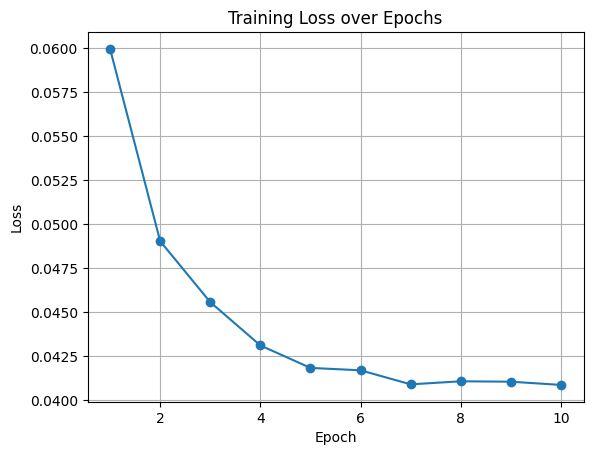

Model saved as 'sar_colorization_model.pth'


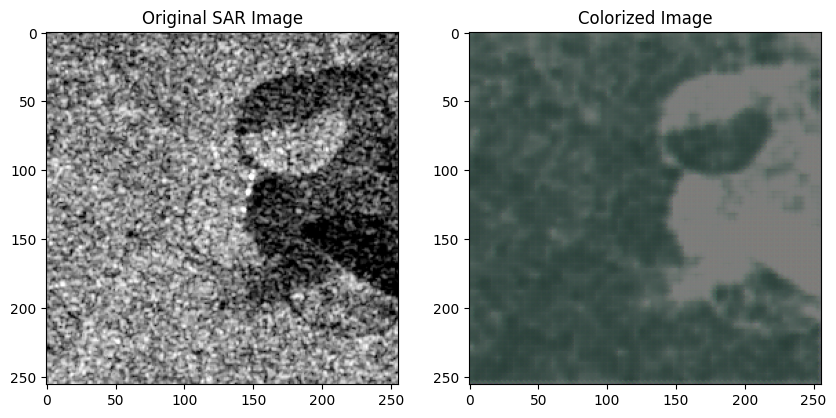

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define paths
base_path = '/content/drive/MyDrive/v_2/'
sar_path = os.path.join(base_path, 'agri/s1')
optic_path = os.path.join(base_path, 'agri/s2')

# Dataset Class
class SARColorizationDataset(Dataset):
    def __init__(self, sar_dir, optic_dir, transform=None):
        self.sar_dir = sar_dir
        self.optic_dir = optic_dir
        self.sar_images = sorted(os.listdir(sar_dir))[:100]
        self.optic_images = sorted(os.listdir(optic_dir))[:100]
        self.transform = transform

    def __len__(self):
        return len(self.sar_images)

    def __getitem__(self, idx):
        sar_image_path = os.path.join(self.sar_dir, self.sar_images[idx])
        optic_image_path = os.path.join(self.optic_dir, self.optic_images[idx])

        sar_image = Image.open(sar_image_path).convert('L') # Convert SAR to grayscale
        optic_image = Image.open(optic_image_path).convert('RGB') # Convert Optical to RGB

        if self.transform:
            sar_image = self.transform(sar_image)
            optic_image = self.transform(optic_image)

        return sar_image, optic_image

# Define transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Create dataset and dataloader
dataset = SARColorizationDataset(sar_path, optic_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Simple Neural Network Model
class SimpleColorizationNet(nn.Module):
    def __init__(self):
        super(SimpleColorizationNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleColorizationNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
losses = []
for epoch in range(10):  # Run for 10 epochs
    epoch_loss = 0
    for sar_images, optic_images in dataloader:
        optimizer.zero_grad()
        outputs = model(sar_images)
        loss = criterion(outputs, optic_images)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    average_loss = epoch_loss / len(dataloader)
    losses.append(average_loss)
    print(f'Epoch {epoch+1}, Loss: {average_loss}')

# Plotting the loss
plt.plot(range(1, 11), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Save the model
torch.save(model.state_dict(), 'sar_colorization_model.pth')
print("Model saved as 'sar_colorization_model.pth'")

# Function to colorize a random SAR image
def colorize_random_image(model, transform, sar_dir):
    # Load a random SAR image
    sar_images = sorted(os.listdir(sar_dir))
    random_image_path = os.path.join(sar_dir, np.random.choice(sar_images))
    sar_image = Image.open(random_image_path).convert('L')
    sar_tensor = transform(sar_image).unsqueeze(0)  # Add batch dimension

    # Colorize the image
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        colorized_image = model(sar_tensor).squeeze(0)  # Remove batch dimension

    # Convert tensor to image
    colorized_image = transforms.ToPILImage()(colorized_image)
    return sar_image, colorized_image

# Applying the model on a random image and showing the result
sar_image, colorized_image = colorize_random_image(model, transform, sar_path)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sar_image, cmap='gray')
plt.title('Original SAR Image')
plt.subplot(1, 2, 2)
plt.imshow(colorized_image)
plt.title('Colorized Image')
plt.show()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 256, 256, 64)   │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 128, 128, 64)   │              0 │ conv2d_16[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 64, 64, 128)    │              0 │ conv2d_17[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 32, 32, 256)    │              0 │ conv2d_18[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_6           │ (None, 64, 64, 512)    │              0 │ conv2d_19[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 64, 64, 768)    │              0 │ up_sampling2d_6[0][0], │
│ (Concatenate)             │                        │                │ conv2d_18[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 64, 64, 256)    │      1,769,728 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_7           │ (None, 128, 128, 256)  │              0 │ conv2d_20[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 128, 128, 384)  │              0 │ up_sampling2d_7[0][0], │
│ (Concatenate)             │                        │                │ conv2d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 128, 128, 128)  │        442,496 │ concatenate_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_8           │ (None, 256, 256, 128)  │              0 │ conv2d_21[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├──────────────────────

 Total params: 3,872,899 (14.77 MB)

 Trainable params: 3,872,899 (14.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.3718 - loss: 0.0687 - val_accuracy: 0.1944 - val_loss: 0.0491
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.2231 - loss: 0.0497 - val_accuracy: 0.5656 - val_loss: 0.0432
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.5812 - loss: 0.0429 - val_accuracy: 0.4802 - val_loss: 0.0442
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.4404 - loss: 0.0424 - val_accuracy: 0.5656 - val_loss: 0.0424
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.5746 - loss: 0.0413 - val_accuracy: 0.5653 - val_loss: 0.0429
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.5749 - loss: 0.0413 - val_accuracy: 0.5649 - val_loss: 0.0434
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.5963 - loss: 0.0410 - val_accuracy: 0.5659 - val_loss: 0.0421
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.5937 - loss: 0.0408 - val_accuracy: 0.5648 - val_loss:

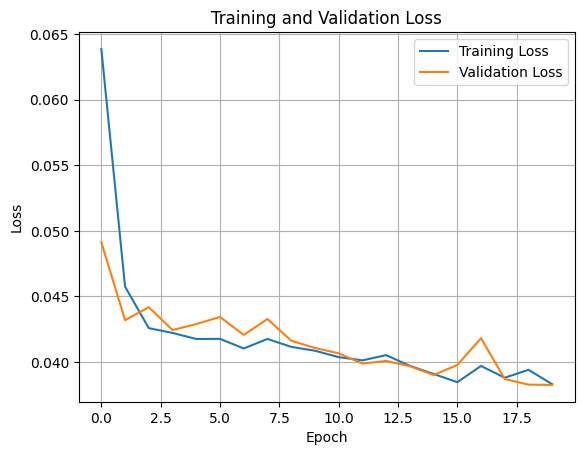

Model saved as 'sar_colorization_unet.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


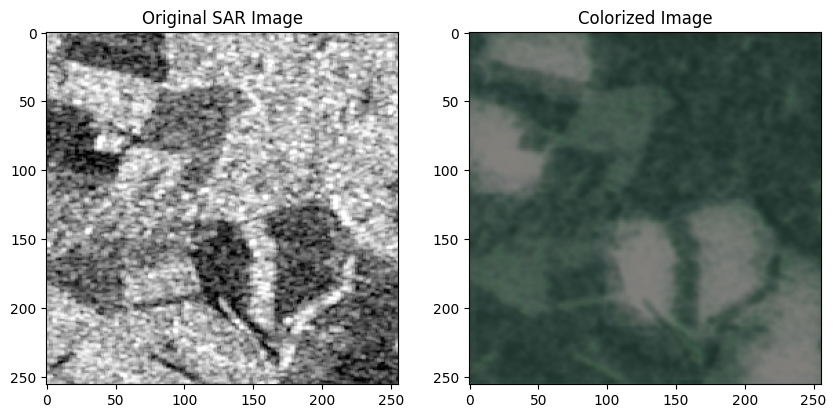

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define paths
base_path = '/content/drive/MyDrive/v_2/'
sar_path = os.path.join(base_path, 'agri/s1')
optic_path = os.path.join(base_path, 'agri/s2')

# Load and preprocess images
def load_images(sar_dir, optic_dir, img_size=(256, 256)):
    sar_images = sorted(os.listdir(sar_dir))[:100]
    optic_images = sorted(os.listdir(optic_dir))[:100]

    sar_data = []
    optic_data = []

    for sar_img, optic_img in zip(sar_images, optic_images):
        sar_image = load_img(os.path.join(sar_dir, sar_img), color_mode='grayscale', target_size=img_size)
        optic_image = load_img(os.path.join(optic_dir, optic_img), target_size=img_size)

        sar_data.append(img_to_array(sar_image) / 255.0)  # Normalize
        optic_data.append(img_to_array(optic_image) / 255.0)  # Normalize

    sar_data = np.array(sar_data)
    optic_data = np.array(optic_data)
    return sar_data, optic_data

# Load dataset
sar_data, optic_data = load_images(sar_path, optic_path)
sar_data = sar_data.reshape(-1, 256, 256, 1)  # Add channel dimension for grayscale images

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(sar_data, optic_data, test_size=0.2, random_state=42)

# Define U-Net Model
def unet_model(input_shape):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    bn = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)

    # Decoder
    u1 = UpSampling2D((2, 2))(bn)
    m1 = concatenate([u1, c3])
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(m1)

    u2 = UpSampling2D((2, 2))(c4)
    m2 = concatenate([u2, c2])
    c5 = Conv2D(128, (3, 3), activation='relu', padding='same')(m2)

    u3 = UpSampling2D((2, 2))(c5)
    m3 = concatenate([u3, c1])
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same')(m3)

    outputs = Conv2D(3, (1, 1), activation='sigmoid')(c6)

    return Model(inputs, outputs)

# Initialize and compile model
model = unet_model((256, 256, 1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=20,
                    batch_size=10)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
model.save('sar_colorization_unet.h5', save_format='tf')
print("Model saved as 'sar_colorization_unet.h5'")

# Colorize a random SAR image from validation set
def colorize_random_image(model, sar_data, img_size=(256, 256)):
    random_index = np.random.randint(len(sar_data))
    sar_image = sar_data[random_index]

    # Add batch dimension for prediction
    sar_tensor = np.expand_dims(sar_image, axis=0)

    # Predict colorization
    predicted_image = model.predict(sar_tensor)[0]

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sar_image.squeeze(), cmap='gray')
    plt.title('Original SAR Image')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_image)
    plt.title('Colorized Image')
    plt.show()

# Apply model on a random SAR image
colorize_random_image(model, x_val)
